# Simulating a Real-World Phenomenon - Irish Discrimination Rates

Explain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
total_survey = int(round(T / 0.12))
print("Estimated Total Survey Size: ", total_survey)


M_Y = (M/total_survey)
F_Y = (F/total_survey)

M_R = (M/total_survey)*100
F_R = (F/total_survey)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  4.449781042520129
Percentage of Females who felt discriminated against:  7.550501483260348


## Sex

In [3]:
# Set Array
sex_x = ['Male', 'Female']


# Build Dataframe - Assume 50% Males and Females
sex = np.random.choice(sex_x, total_survey, p=[0.5, 0.5])

df=pd.DataFrame(data={'Sex': sex})


print(df.head(10))

      Sex
0    Male
1    Male
2    Male
3    Male
4  Female
5    Male
6    Male
7    Male
8  Female
9  Female


## Experienced Discrimination

In [4]:
# Set Array
disc_x = ['M_Y', 'F_Y', 'M_N', 'F_N']

# Assume 50% Males and 50% Females
M_N = 0.5 - M_Y
F_N = 0.5 - F_Y


# Build Dataframe
disc = np.random.choice(disc_x, total_survey, p=[M_Y, F_Y, M_N, F_N])
df['Discriminated Against'] = disc

df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df.head(10))

      Sex Discriminated Against
0    Male                    No
1    Male                    No
2    Male                   Yes
3    Male                   Yes
4  Female                    No
5    Male                    No
6    Male                    No
7    Male                    No
8  Female                   Yes
9  Female                    No


## Discrimination Type

In [5]:
# Set Array
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']

# Males

# Set Discrimination Types %
gen_m = 9
mar_m = 3
fam_m = 9
age_m = 24
dis_m = 6
rac_m = 21
oth_m = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_m = gen_m + mar_m + fam_m + age_m + dis_m +  rac_m + oth_m

gen_m = gen_m/tot_disc_m
mar_m = mar_m/tot_disc_m
fam_m = fam_m/tot_disc_m
age_m = age_m/tot_disc_m
dis_m = dis_m/tot_disc_m
rac_m = rac_m/tot_disc_m
oth_m = oth_m/tot_disc_m

# Females

# Set Discrimination Types %
gen_f = 14 
mar_f = 5
fam_f = 14
age_f = 24
dis_f = 6
rac_f = 17
oth_f = 36

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_f = gen_f + mar_f + fam_f + age_f + dis_f +  rac_f + oth_f

gen_f = gen_f/tot_disc_f
mar_f = mar_f/tot_disc_f
fam_f = fam_f/tot_disc_f
age_f = age_f/tot_disc_f
dis_f = dis_f/tot_disc_f
rac_f = rac_f/tot_disc_f
oth_f = oth_f/tot_disc_f

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

# Male
disc_yes_m =  df_yes['Sex']=='Male'
df_yes_m = df_yes[disc_yes_m]

# Female
disc_yes_f =  df_yes['Sex']=='Female'
df_yes_f = df_yes[disc_yes_f]


disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

# Set Count for Yes

# Male
yes_count_xm = df_yes_m['Discriminated Against']
yes_count_m = yes_count_xm.count()

# Female
yes_count_xf = df_yes_f['Discriminated Against']
yes_count_f = yes_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_m = np.random.choice(discrim_type, yes_count_m, p=[gen_m, mar_m, fam_m, age_m, dis_m, rac_m, oth_m])

# Female
type_disc_f = np.random.choice(discrim_type, yes_count_f, p=[gen_f, mar_f, fam_f, age_f, dis_f, rac_f, oth_f])

# Set Type Column
df_no['Type'] = 'NA'
df_yes_m['Type'] = type_disc_m
df_yes_f['Type'] = type_disc_f


# Join Dataframes
frames_a = [df_yes_m, df_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df.head(10))

      Sex Discriminated Against            Type
0    Male                    No              NA
1    Male                    No              NA
2    Male                   Yes           Other
3    Male                   Yes  Marital Status
4  Female                    No              NA
5    Male                    No              NA
6    Male                    No              NA
7    Male                    No              NA
8  Female                   Yes          Gender
9  Female                    No              NA


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

## Social Setting

In [7]:
# Set Array
discrim_set = ['Workplace', 'Looking for Work', 'Public Place', 'Banks', 'Education', 'Obtaining Housing', 'Accessing health services', 'Using transport services', 'Accessing public services']

# Note there is no clear connection detailed between social setting and discrimination type, therefor random

# Males

# Set Discrimination Setting %
wrk_m = 26
lrk_m = 31
pub_m = 17
ban_m = 16
edu_m = 4
hou_m = 10
hea_m = 11
tra_m = 4
ser_m = 10

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_m = wrk_m + lrk_m + pub_m + ban_m + edu_m + hou_m + hea_m + tra_m + ser_m

wrk_m = wrk_m/tot_disc_set_m
lrk_m = lrk_m/tot_disc_set_m
pub_m = pub_m/tot_disc_set_m
ban_m = ban_m/tot_disc_set_m
edu_m = edu_m/tot_disc_set_m
hou_m = hou_m/tot_disc_set_m
hea_m = hea_m/tot_disc_set_m
tra_m = tra_m/tot_disc_set_m
ser_m = ser_m/tot_disc_set_m

# Females

# Set Discrimination Setting %
wrk_f = 31
lrk_f = 22
pub_f = 19
ban_f = 16
edu_f = 5
hou_f = 11
hea_f = 15
tra_f = 5
ser_f = 7

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc_set_f = wrk_f + lrk_f + pub_f + ban_f + edu_f + hou_f + hea_f + tra_f + ser_f

wrk_f = wrk_f/tot_disc_set_f
lrk_f = lrk_f/tot_disc_set_f
pub_f = pub_f/tot_disc_set_f
ban_f = ban_f/tot_disc_set_f
edu_f = edu_f/tot_disc_set_f
hou_f = hou_f/tot_disc_set_f
hea_f = hea_f/tot_disc_set_f
tra_f = tra_f/tot_disc_set_f
ser_f = ser_f/tot_disc_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_disc_set_m = np.random.choice(discrim_set, yes_set_count_m, p=[wrk_m, lrk_m ,pub_m ,ban_m ,edu_m ,hou_m, hea_m, tra_m, ser_m])

# Female
type_disc_set_f = np.random.choice(discrim_set, yes_set_count_f, p=[wrk_f, lrk_f ,pub_f ,ban_f ,edu_f ,hou_f, hea_f, tra_f, ser_f])

# Set Type Column
df_set_no['Social Setting'] = 'NA'
df_set_yes_m['Social Setting'] = type_disc_set_m
df_set_yes_f['Social Setting'] = type_disc_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)
print(df.head(10))

      Sex Discriminated Against            Type     Social Setting
0    Male                    No              NA                 NA
1    Male                    No              NA                 NA
2    Male                   Yes           Other   Looking for Work
3    Male                   Yes  Marital Status   Looking for Work
4  Female                    No              NA                 NA
5    Male                    No              NA                 NA
6    Male                    No              NA                 NA
7    Male                    No              NA                 NA
8  Female                   Yes          Gender  Obtaining Housing
9  Female                    No              NA                 NA


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

## Action Taken

In [9]:
# Set Array
action_set = ['Verbal', 'Written', 'Offical / Legal', 'No Action']

# Note there is no clear connection detailed between Action Taken to social setting and discrimination type, therefore random

# Males

# Set Discrimination Setting %
ver_m = 23
wri_m = 7
off_m = 10
noa_m = 65

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_m = ver_m + wri_m + off_m + noa_m

ver_m = ver_m/tot_act_set_m
wri_m = wri_m/tot_act_set_m
off_m = off_m/tot_act_set_m
noa_m = noa_m/tot_act_set_m


# Females

# Set Discrimination Setting %
ver_f = 27
wri_f = 9
off_f = 9
noa_f = 63

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_act_set_f = ver_f + wri_f + off_f + noa_f

ver_f = ver_f/tot_act_set_f
wri_f = wri_f/tot_act_set_f
off_f = off_f/tot_act_set_f
noa_f = noa_f/tot_act_set_f

# Split Dataframe
disc_set_yes =  df['Discriminated Against']=='Yes'
df_set_yes = df[disc_set_yes]

# Male
disc_set_yes_m =  df_set_yes['Sex']=='Male'
df_set_yes_m = df_set_yes[disc_set_yes_m]

# Female
disc_set_yes_f =  df_set_yes['Sex']=='Female'
df_set_yes_f = df_set_yes[disc_set_yes_f]


disc_set_no =  df['Discriminated Against']=='No'
df_set_no = df[disc_set_no]

# Set Count for Yes

# Male
yes_set_count_xm = df_set_yes_m['Discriminated Against']
yes_set_count_m = yes_set_count_xm.count()

# Female
yes_set_count_xf = df_set_yes_f['Discriminated Against']
yes_set_count_f = yes_set_count_xf.count()

# Populate Weighted Random Choice

# Male
type_act_set_m = np.random.choice(action_set, yes_set_count_m, p=[ver_m, wri_m, off_m, noa_m])

# Female
type_act_set_f = np.random.choice(action_set, yes_set_count_f, p=[ver_f, wri_f, off_f, noa_f])

# Set Action Column
df_set_no['Type Action Taken'] = 'NA'
df_set_yes_m['Type Action Taken'] = type_act_set_m
df_set_yes_f['Type Action Taken'] = type_act_set_f


# Join Dataframes
frames_a = [df_set_yes_m, df_set_yes_f]

df_a = pd.concat(frames_a)

frames_b = [df_set_no, df_a]

df = pd.concat(frames_b)

# Sort by index
df.sort_index(inplace=True)

# Add Action Y/N Column
df['Action Taken'] = df['Type Action Taken']
df ['Action Taken'].replace({'Verbal':'Yes', 'Written':'Yes', 'Offical / Legal':'Yes', 'No Action':'No'}, inplace=True)

print(df.head(10))

      Sex Discriminated Against            Type     Social Setting  \
0    Male                    No              NA                 NA   
1    Male                    No              NA                 NA   
2    Male                   Yes           Other   Looking for Work   
3    Male                   Yes  Marital Status   Looking for Work   
4  Female                    No              NA                 NA   
5    Male                    No              NA                 NA   
6    Male                    No              NA                 NA   
7    Male                    No              NA                 NA   
8  Female                   Yes          Gender  Obtaining Housing   
9  Female                    No              NA                 NA   

  Type Action Taken Action Taken  
0                NA           NA  
1                NA           NA  
2            Verbal          Yes  
3         No Action           No  
4                NA           NA  
5                NA

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

## Sort Columns

In [11]:
df = df[["Sex","Discriminated Against","Type","Social Setting","Action Taken","Type Action Taken"]]
print(df.head(10))

      Sex Discriminated Against            Type     Social Setting  \
0    Male                    No              NA                 NA   
1    Male                    No              NA                 NA   
2    Male                   Yes           Other   Looking for Work   
3    Male                   Yes  Marital Status   Looking for Work   
4  Female                    No              NA                 NA   
5    Male                    No              NA                 NA   
6    Male                    No              NA                 NA   
7    Male                    No              NA                 NA   
8  Female                   Yes          Gender  Obtaining Housing   
9  Female                    No              NA                 NA   

  Action Taken Type Action Taken  
0           NA                NA  
1           NA                NA  
2          Yes            Verbal  
3           No         No Action  
4           NA                NA  
5           NA     

           Sex Discriminated Against   Type Social Setting Type Action Taken
count     1706                  1706   1706           1706              1706
unique       2                     1      7              9                 4
top     Female                   Yes  Other      Workplace         No Action
freq       860                  1706    602            363              1030


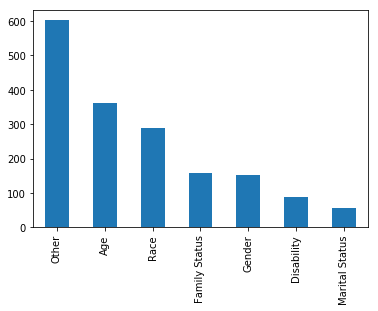

In [12]:
print(df_a.describe())

df_a['Type'].value_counts().plot(kind='bar')